In [48]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

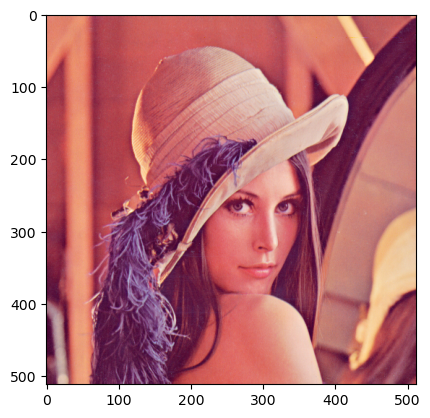

In [49]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

src = cv.imread(path + "test.png")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

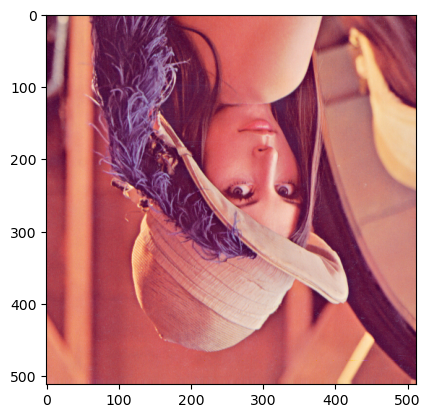

In [50]:
# 0 boca abajo
# 1 para el otro lado
# -1 mezcla de los dos

plt.imshow(cv.flip(src,0))

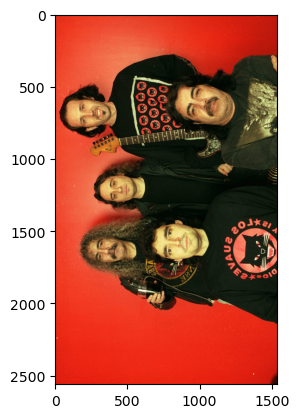

In [51]:
plt.imshow(cv.transpose(cv.cvtColor(cv.imread(path + "suaves.jpg"), cv.COLOR_BGR2RGB)))   # Gira las dimensiones si no es del mismo tamaño si se vería afectado

512 512


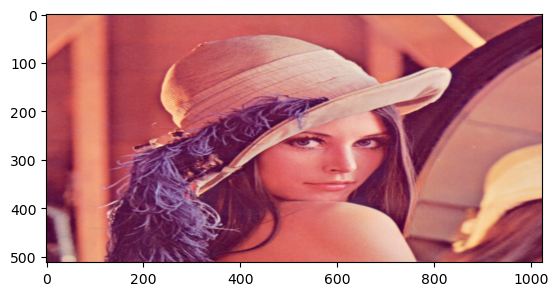

In [52]:
print(src.shape[0],src.shape[1])
# La imagen, el nuevo tamaño, el nuevo tipo de resize
dist = cv.resize(src,(src.shape[0]*2,src.shape[1]),cv.INTER_CUBIC)
plt.imshow(dist)

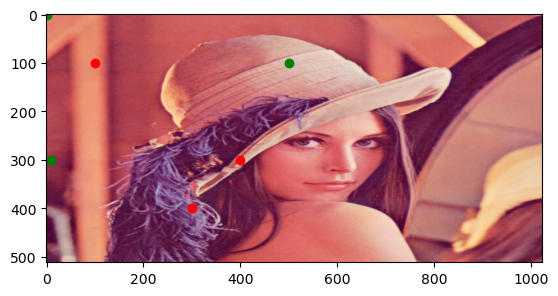

In [63]:
src1 = np.array([[0,0], [10, 300], [500, 100]]).astype(np.float32)
plt.scatter([src1[0][0], src1[1,0],src1[2,0]],
            [src1[0][1],src1[1,1],src1[2,1]],
            color="g")

src2 = np.array([[100,100], [300, 400], [400, 300]]).astype(np.float32)
plt.scatter([src2[0][0], src2[1,0],src2[2,0]],
            [src2[0][1],src2[1,1],src2[2,1]],
            color="r")

plt.imshow(dist)

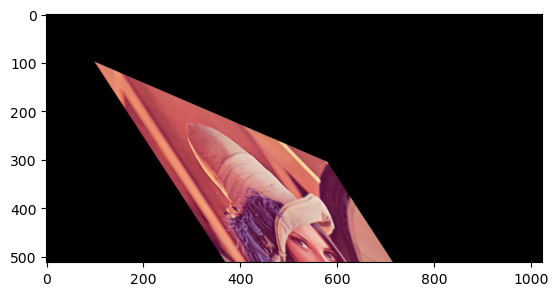

In [64]:
warp_mat = cv.getAffineTransform(src1, src2)
warp_dst = cv.warpAffine(dist, warp_mat, (dist.shape[1], dist.shape[0]))
plt.imshow(warp_dst)


[[  0.4330127    0.25       176.79491924]
 [ -0.25         0.4330127  213.39745962]]


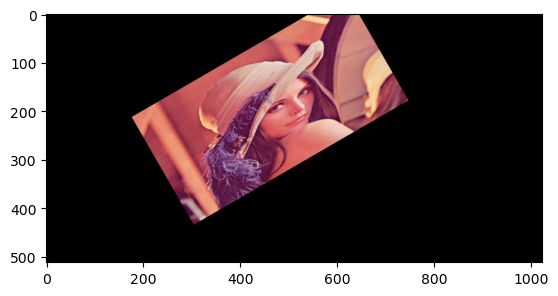

In [68]:
centro = (400,200)
anguloRotar = 30
scale = 0.5
rot_mat = cv.getRotationMatrix2D(centro,anguloRotar,scale)
print(rot_mat)
rot_dst = cv.warpAffine(dist, rot_mat, (dist.shape[1], dist.shape[0]))
plt.imshow(rot_dst)

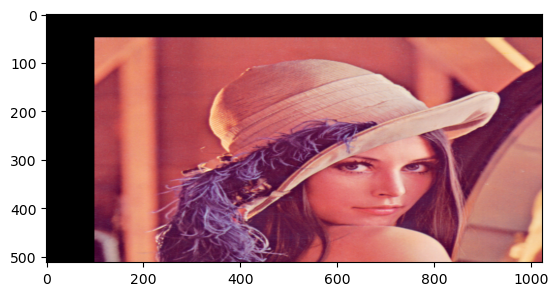

In [71]:
tx = 100
ty = 50
tra_mat = np.float32([[1,0,tx], [0,1,ty]])
tra_dst = cv.warpAffine(dist, tra_mat, (dist.shape[1], dist.shape[0]))
plt.imshow(tra_dst)

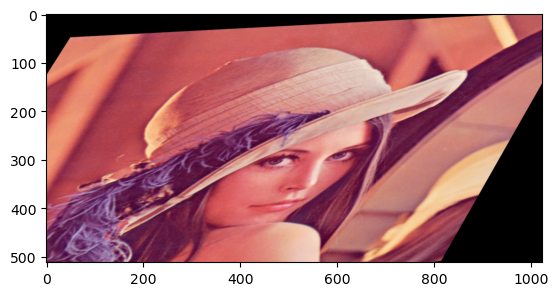

In [75]:
src1 = np.array([[0,0], [900, 0], [200, 400], [1000, 500]]).astype(np.float32)

src2 = np.array([[50, 50], [1000, 0], [0, 500], [800,500]]).astype(np.float32)
p_mat = cv.getPerspectiveTransform(src1, src2)
p_dst = cv.warpPerspective(dist, p_mat, (dist.shape[1], dist.shape[0]))

plt.imshow(p_dst)